In [6]:
! pip install pyarrow
! pip install pydot
! pip install graphviz 
# Using ann-visualizer
! pip install ann-visualizer

In [33]:
# для обработки данных
import numpy as np 
import pandas as pd
import pyarrow
import pydot 
# для работы с переменными и компонентами
from sklearn.decomposition import FactorAnalysis, PCA
from pandas.plotting import scatter_matrix


from scipy.stats import pearsonr

# для построения моделей

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score
from keras.utils import plot_model

# для визуализации
import matplotlib.pyplot as plt
from ann_visualizer.visualize import ann_viz
import seaborn as sns
import graphviz
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# **1. Анализ  и обработка данных**


---


**Раздел включает в себя:**
* предварительная обработка данных;
* разведочный анализ данных.


Данные файлов `train_data_` обобщают поведение около $9\ 000$ активных держателей кредитных карт за последние $6$ месяцев. 

Файл содержит $18$ поведенческих переменных клиентов:

| Переменная |Описание переменной |
| --- | --- |
| CUST ID | номер клиента |
| BALANCE  | сумма остатка на их счету |
| BALANCEFREQUENCY  | как часто обновляется баланс |
| PURCHASES  | сумма покупок |
| ONEOFFPURCHASES  | максимальная сумма единовременной покупки |
| INSTALLMENTSPURCHASES  | сумма покупки в рассрочку |
| CASHADVANCE  | предоставление наличных денег пользователем |
| PURCHASESFREQUENCY  | как часто совершаются покупки, от 0 до 1 (1 = часто покупают, 0 = редко покупают) |
| ONEOFFPURCHASESFREQUENCY   | как часто совершаются разовые покупки (1 = часто покупаются, 0 = редко покупаются) |
| PURCHASESINSTALLMENTSFREQUENCY   | как часто совершаются покупки в рассрочку (1 = часто, 0 = редко) |
| CASHADVANCEFREQUENCY  | как часто выплачиваются наличные авансом |
| CASHADVANCETRX   | количество транзакций, совершенных с помощью «Cash in Advanced» |
| PURCHASESTRX   | количество совершенных транзакций покупки |
| CREDITLIMIT   | лимит кредитной карты для пользователя |
| PAYMENTS    | сумма платежа, сделанного пользователем |
| MINIMUM_PAYMENTS   | минимальная сумма платежей пользователя |
| PRCFULLPAYMENT    | процент от полной оплаты, уплаченный пользователем |
| TENURE    | срок обслуживания кредитной карты для пользователя |

In [18]:
df1 = pd.read_parquet('C:\\Users\\USER\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\train_data\\train_data_0.pq') 
df1.shape # размерность данных 

(1974724, 61)

In [19]:
unique_customers = df1['id'].nunique()
print('Количество уникальных покупателей:', unique_customers)

Количество уникальных покупателей: 250000


In [11]:
df1.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0


In [69]:
for i in range(len(credit.columns.to_list())):
  print(f"Число уникальных значений в признаке {str(credit.columns.to_list()[i]).ljust(35)} - "
    f"{str(credit[credit.columns.to_list()[i]].nunique()).rjust(5)}")

Число уникальных значений в признаке id                                  - 250000
Число уникальных значений в признаке rn                                  -    51
Число уникальных значений в признаке pre_since_opened                    -    20
Число уникальных значений в признаке pre_since_confirmed                 -    18
Число уникальных значений в признаке pre_pterm                           -    18
Число уникальных значений в признаке pre_fterm                           -    17
Число уникальных значений в признаке pre_till_pclose                     -    17
Число уникальных значений в признаке pre_till_fclose                     -    16
Число уникальных значений в признаке pre_loans_credit_limit              -    20
Число уникальных значений в признаке pre_loans_next_pay_summ             -     7
Число уникальных значений в признаке pre_loans_outstanding               -     5
Число уникальных значений в признаке pre_loans_total_overdue             -     1
Число уникальных значений в

In [21]:
flag = pd.read_csv('C:\\Users\\USER\\Desktop\\Диплом\\Данные по долгам\\Соревнование по кредитным историям\\data_for_competition\\train_target.csv') 
flag.shape # размерность данных

(3000000, 2)

In [5]:
unique_customers = flag['id'].nunique()
print('Количество уникальных покупателей:', unique_customers)

Количество уникальных покупателей: 3000000


In [15]:
flag.head()

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [22]:
credit = pd.merge(df1, flag, on='id')
credit.iloc[:, 10:20]

,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5
0,3,0,2,11,6,16,5,4,8,1
1,3,0,2,11,6,16,5,4,8,1
2,5,0,2,8,6,16,5,4,8,1
3,3,0,2,4,6,16,5,4,8,0
4,3,0,2,4,6,16,5,4,8,1
...,...,...,...,...,...,...,...,...,...,...
1974719,2,0,2,4,6,16,5,4,8,1
1974720,4,0,2,7,6,16,5,4,8,1
1974721,3,0,2,7,6,16,5,4,8,1
1974722,3,0,2,7,6,16,5,4,8,1


In [17]:
credit.shape

(1974724, 62)

In [18]:
unique_customers = credit['id'].nunique()
print(unique_customers)

250000


## Обработка

In [31]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974724 entries, 0 to 1974723
Data columns (total 62 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19  

In [27]:
credit.isnull().sum()

id                       0
rn                       0
pre_since_opened         0
pre_since_confirmed      0
pre_pterm                0
                        ..
enc_loans_credit_type    0
enc_loans_account_cur    0
pclose_flag              0
fclose_flag              0
flag                     0
Length: 62, dtype: int64

In [28]:
credit.isnull().sum().sum()

0

In [40]:
credit.columns.to_list()[1:5]

['rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm']

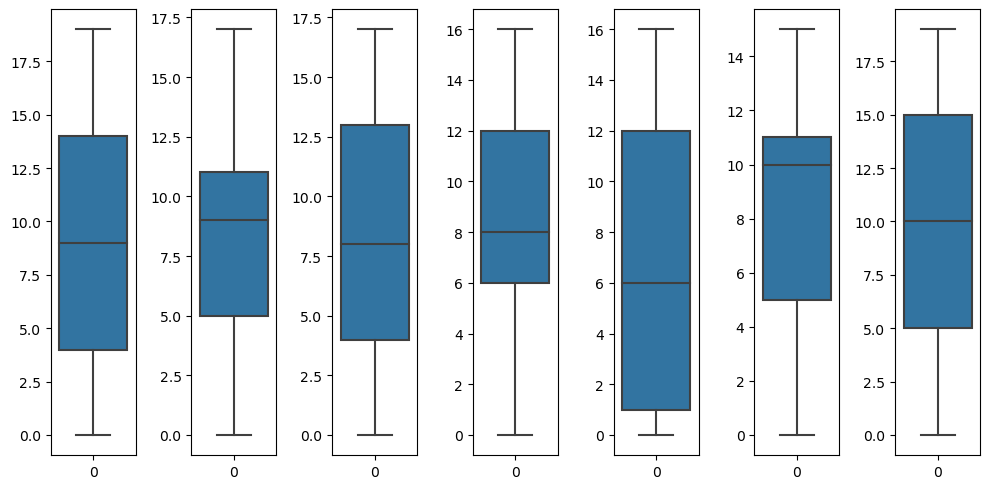

In [58]:
# Create a list of column names to plot
cols = credit.columns.to_list()[2:9]

# Create a figure with subplots
fig, axs = plt.subplots(1, 7, figsize=(10, 5))

# Loop through the columns and create a boxplot for each one
for i, colname in enumerate(cols):
    sns.boxplot(credit[colname], ax=axs[i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


<Axes: >

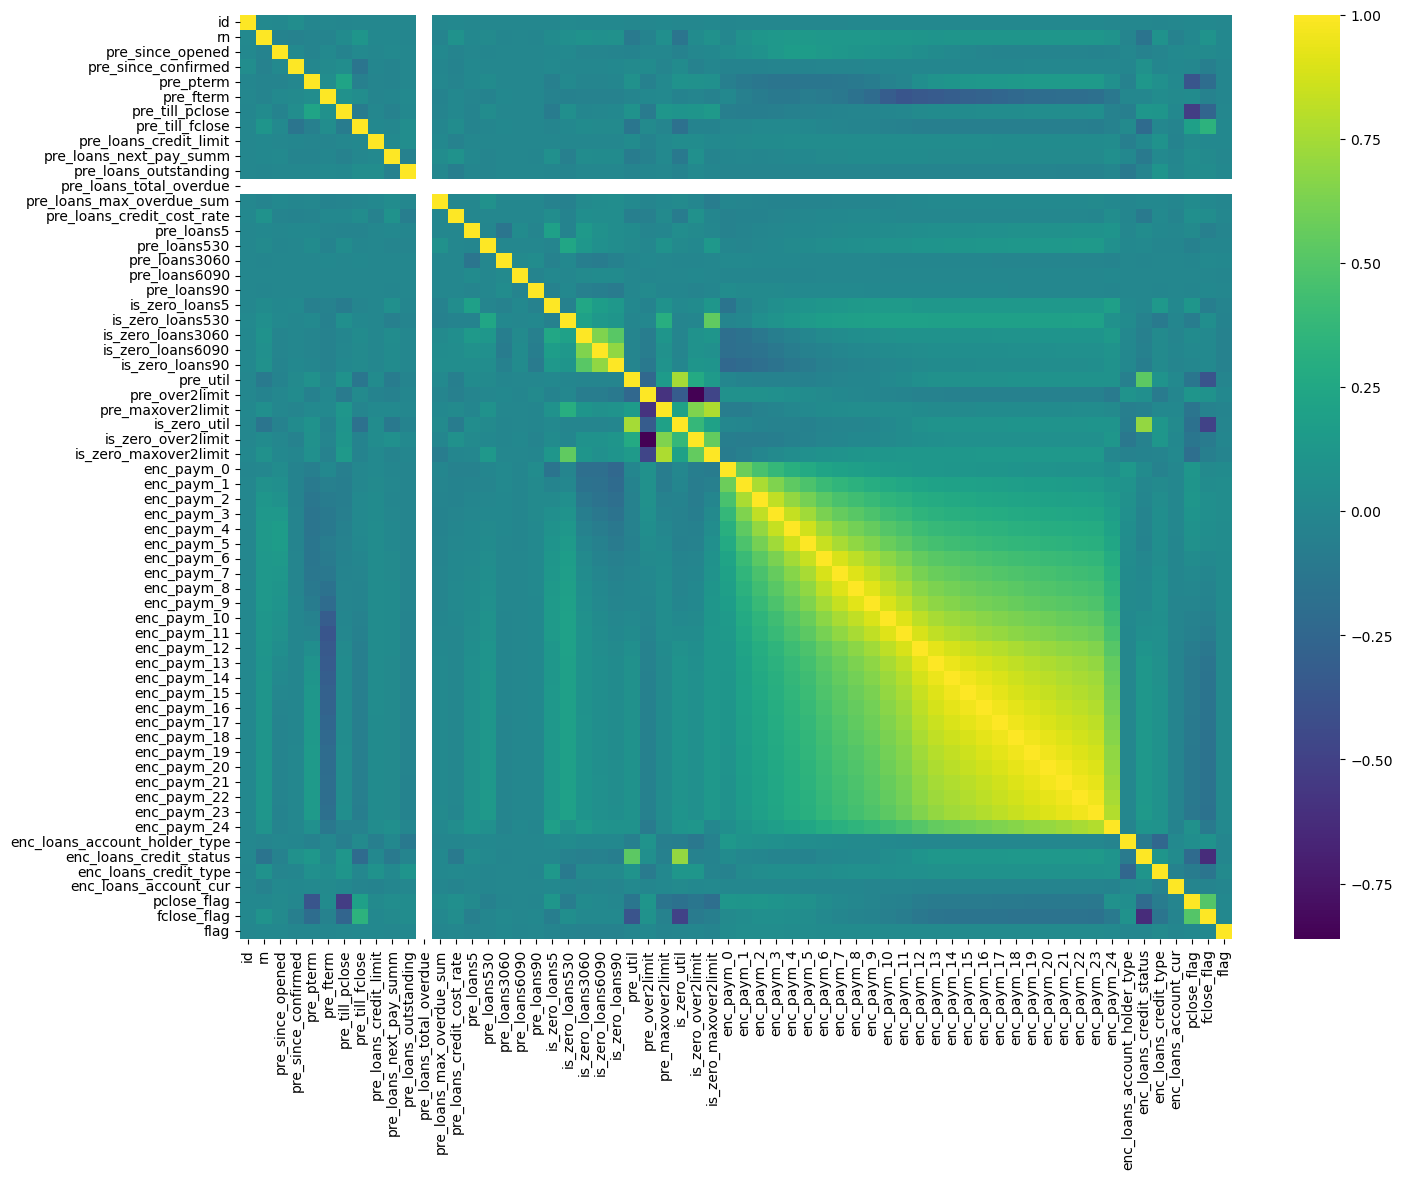

In [60]:
credit.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=credit.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [15]:
len(credit.columns)

62

In [23]:
credit = credit.drop(columns=['pre_loans_total_overdue'])

In [24]:
def drop_columns_by_prefix(df, prefix):
    # get all column names that start with the prefix
    columns_to_drop = [col for col in df.columns if col.startswith(prefix)]
    
    # drop the columns
    df = df.drop(columns=columns_to_drop)
    
    return df
credit = drop_columns_by_prefix(credit, 'enc_paym_')

In [25]:
len(credit.columns)

36

<Axes: >

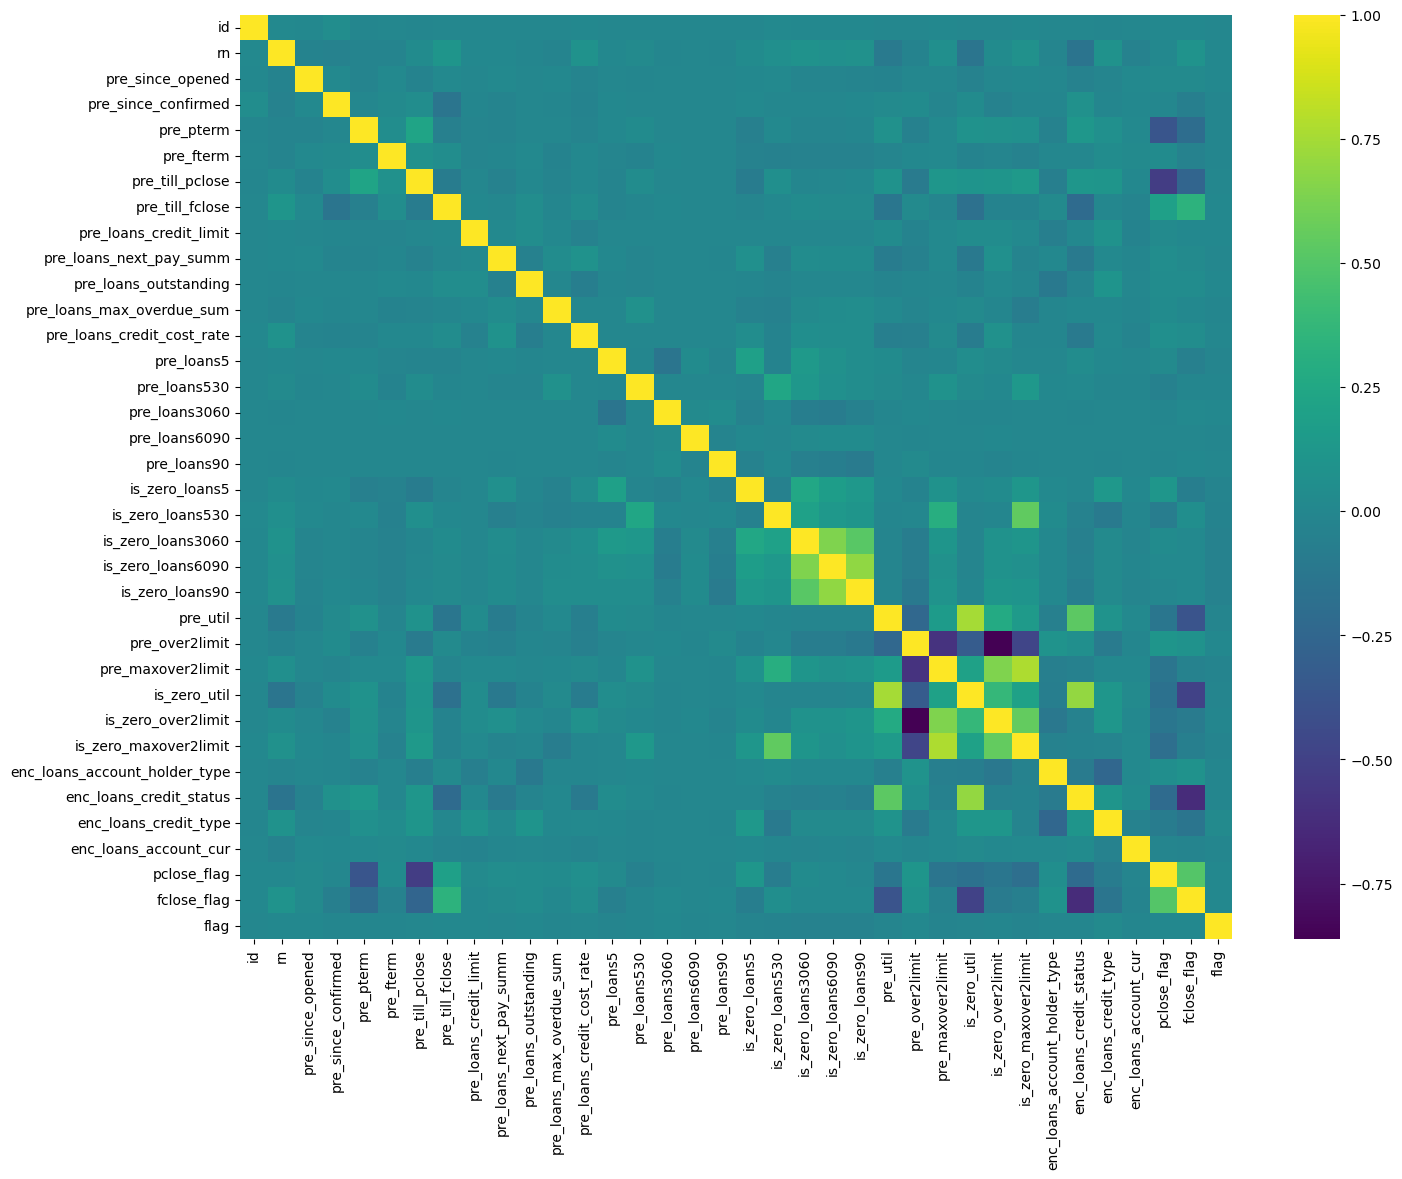

In [19]:
credit.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=credit.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [20]:
len(credit.columns)

36

# Построение архитектуры нейронной сети

## Feedworward NN

### Простейшая модель

In [26]:
data = credit
X = data.drop(['id', 'flag'], axis=1) # Features
y = data['flag'] # Target variable

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
data = credit
X = data.drop(['id', 'flag'], axis=1) # Features
y = data['flag'] # Target variable

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
model_fnn_1 = Sequential()
model_fnn_1.add(Dense(16, activation='relu', input_dim=34))
model_fnn_1.add(Dense(8, activation='relu'))
model_fnn_1.add(Dense(1, activation='sigmoid'))

# compile the model
model_fnn_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model_fnn_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
49369/49369 [==============================] - 41s 809us/step - loss: 0.1299 - accuracy: 0.9709 - val_loss: 0.1284 - val_accuracy: 0.9710
Epoch 2/10
49369/49369 [==============================] - 39s 793us/step - loss: 0.1279 - accuracy: 0.9711 - val_loss: 0.1281 - val_accuracy: 0.9710
Epoch 3/10
49369/49369 [==============================] - 39s 793us/step - loss: 0.1277 - accuracy: 0.9711 - val_loss: 0.1280 - val_accuracy: 0.9710
Epoch 4/10
49369/49369 [==============================] - 39s 794us/step - loss: 0.1275 - accuracy: 0.9711 - val_loss: 0.1277 - val_accuracy: 0.9710
Epoch 5/10
49369/49369 [==============================] - 40s 817us/step - loss: 0.1274 - accuracy: 0.9711 - val_loss: 0.1277 - val_accuracy: 0.9710
Epoch 6/10
49369/49369 [==============================] - 40s 816us/step - loss: 0.1273 - accuracy: 0.9711 - val_loss: 0.1277 - val_accuracy: 0.9710
Epoch 7/10
49369/49369 [==============================] - 40s 812us/step - loss: 0.1273 - accuracy: 0.9711

In [29]:
model_fnn_1.save('model_fnn_1.h5')

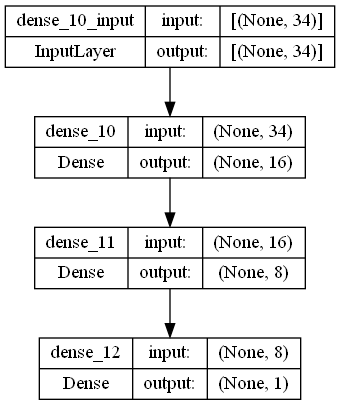

In [87]:
model_fnn_1 = load_model('Models\\model_fnn_1.h5')
plot_model(model_fnn_1, show_shapes=True, show_layer_names=True, to_file='Models architectures\\model_fnn_1.png')

In [88]:
ann_viz(model_fnn_1, title="Модель 1")

### Средняя модель

In [ ]:
data = credit
X = data.drop(['id', 'flag'], axis=1) # Features
y = data['flag'] # Target variable

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
model_fnn_2 = Sequential()
model_fnn_2.add(Dense(64, activation='relu', input_dim=34))
model_fnn_2.add(Dropout(0.2))
model_fnn_2.add(Dense(32, activation='relu'))
model_fnn_2.add(Dropout(0.2))
model_fnn_2.add(Dense(16, activation='relu'))
model_fnn_2.add(Dropout(0.2))
model_fnn_2.add(Dense(8, activation='relu'))
model_fnn_2.add(Dense(1, activation='sigmoid'))

# compile the model
model_fnn_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model_fnn_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
49369/49369 [==============================] - 52s 1ms/step - loss: 0.1304 - accuracy: 0.9710 - val_loss: 0.1282 - val_accuracy: 0.9710
Epoch 2/10
49369/49369 [==============================] - 52s 1ms/step - loss: 0.1286 - accuracy: 0.9711 - val_loss: 0.1283 - val_accuracy: 0.9710
Epoch 3/10
49369/49369 [==============================] - 52s 1ms/step - loss: 0.1284 - accuracy: 0.9711 - val_loss: 0.1278 - val_accuracy: 0.9710
Epoch 4/10
49369/49369 [==============================] - 53s 1ms/step - loss: 0.1282 - accuracy: 0.9711 - val_loss: 0.1279 - val_accuracy: 0.9710
Epoch 5/10
23167/49369 [=============>................] - ETA: 25s - loss: 0.1275 - accuracy: 0.9713

In [ ]:
model_fnn_2.save('Models\\model_fnn_3.h5')

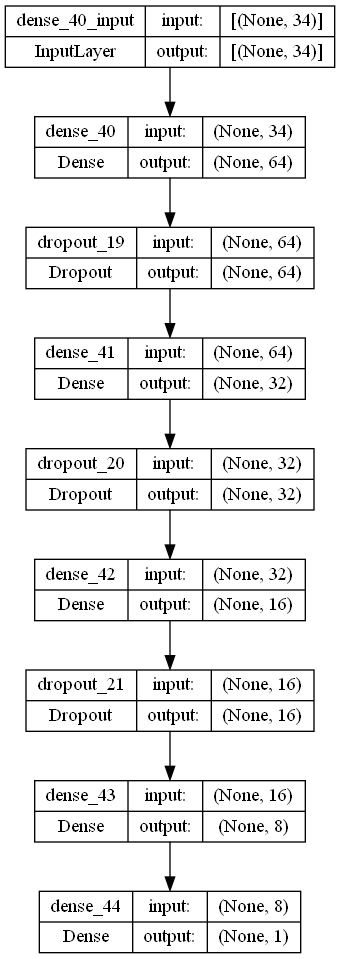

In [84]:
model_fnn_2 = load_model('Models\\model_fnn_2.h5')
plot_model(model_fnn_2, show_shapes=True, show_layer_names=True, to_file='Models architectures\\model_fnn_2.png')

In [89]:
ann_viz(model_fnn_2, title="Модель 2")

### Сложная модель

In [ ]:
data = credit
X = data.drop(['id', 'flag'], axis=1) # Features
y = data['flag'] # Target variable

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
model_fnn_3 = Sequential()
model_fnn_3.add(Dense(128, activation='relu', input_dim=34))
model_fnn_3.add(Dropout(0.2))
model_fnn_3.add(Dense(64, activation='relu'))
model_fnn_3.add(Dropout(0.2))
model_fnn_3.add(Dense(32, activation='relu'))
model_fnn_3.add(Dropout(0.2))
model_fnn_3.add(Dense(16, activation='relu'))
model_fnn_3.add(Dropout(0.2))
model_fnn_3.add(Dense(8, activation='relu'))
model_fnn_3.add(Dropout(0.2))
model_fnn_3.add(Dense(1, activation='sigmoid'))

# compile the model
model_fnn_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model_fnn_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
model_fnn_3.save('Models\\model_fnn_3.h5')

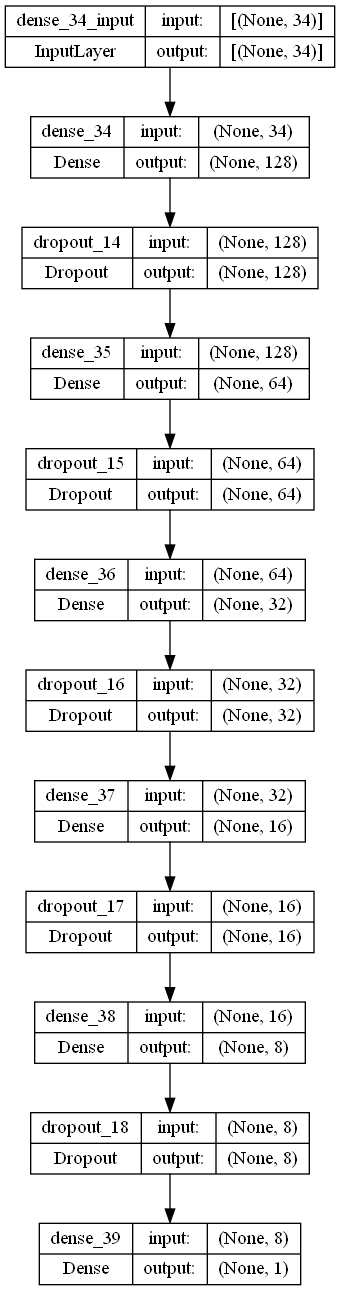

In [85]:
model_fnn_3 = load_model('Models\\model_fnn_3.h5')
plot_model(model_fnn_3, show_shapes=True, show_layer_names=True, to_file='Models architectures\\model_fnn_3.png')

In [90]:
ann_viz(model_fnn_3, title="Модель 3")

### Модель с инета Bank-Loan-Prediction-using-AI

In [74]:
data = credit
X = data.drop(['id', 'flag'], axis=1) # Features
y = data['flag'] # Target variable

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# sequential model
ann_model = Sequential()

# adding dense layer
ann_model.add(Dense(250, input_dim=34, kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500, activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

# adding dense layer with softmax activation/output layer
ann_model.add(Dense(1, activation='softmax'))

# compile the model
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
 2605/49369 [>.............................] - ETA: 6:51 - loss: 0.1400 - accuracy: 0.0282

KeyboardInterrupt: 

In [ ]:
model_fnn_3.save('Models\\model_fnn_3.h5')

## Recurrent NN

### Простейшая модель

### Средняя модель

### Сложная модель

# Оценка моделей

## FNN 1

In [36]:
model_fnn_1 = load_model('Models\\model_fnn_1.h5')

In [27]:
model_fnn_1 = load_model('Models\\model_fnn_1.h5')
# predict probabilities for test set
y_pred_prob = model_fnn_1.predict(X_test)

# compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC AUC score:", roc_auc)

12343/12343 [==============================] - 11s 890us/step
ROC AUC score: 0.6342000791651883


In [68]:
print("Gini:", (2 * roc_auc) - 1)

Gini: 0.19096505533300423


In [65]:
for i in predictions:
    predict.append(np.argmax(i))

In [62]:
# Use the model to make predictions on the test data
#y_pred = model_fnn_1.predict(X_test)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-Score: ', f1)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-Score:  1.0


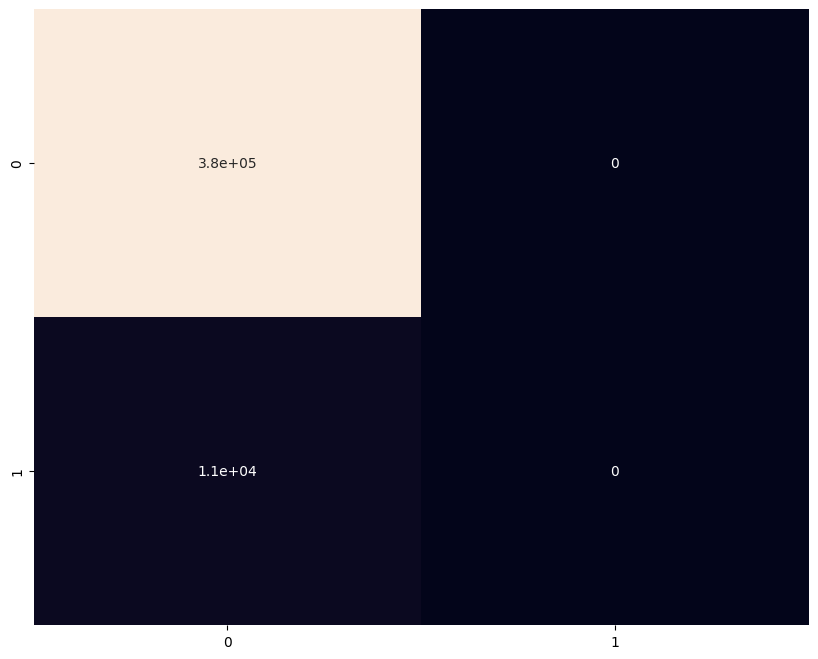

In [41]:
conf_mat = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
plt.show()

## FNN 2

In [30]:
model_fnn_2 = load_model('Models\\model_fnn_2.h5')
# predict probabilities for test set
y_pred_prob = model_fnn_2.predict(X_test)

# compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC AUC score:", roc_auc)

12343/12343 [==============================] - 12s 1ms/step
ROC AUC score: 0.6277706192847248


## FNN 3

In [31]:
model_fnn_3 = load_model('Models\\model_fnn_3.h5')
# predict probabilities for test set
y_pred_prob = model_fnn_3.predict(X_test)

# compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC AUC score:", roc_auc)

12343/12343 [==============================] - 12s 965us/step
ROC AUC score: 0.5954825276665021
